### Why RFM?
- RFM (Recency, Frequency, Monetary) analysis is a marketing model using customer segmentation based on their transaction history.
- This model could be very useful, especially for small and medium-sized enterprises (SMEs) with limited marketing resources, helping them focus on the potentially right customer segments to increase ROI, reduce churn, reduce cost, improve customer relationship, and a lot more.
### How?
- In RFM analysis, customers are scored based on three factors (Recency - how recently, Frequency - how often, Monetary - how much), then labeled based on the combination of RFM scores.
### Reference:
- https://www.putler.com/rfm-analysis

### Problem: This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'C', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import pandas as pd
import numpy as np
#datetime imports for date - time computations
import time
import datetime as dt
from datetime import date
from datetime import timedelta
#Visualization Imports
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
#Load data
df_0 = pd.read_csv('ecommerce_retail inforxlsx.csv')
df_0

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [2]:
df_0.shape

(541909, 8)

In [3]:
# Validate First Few Records of Input train dataframe
df_0.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Data Cleaning

In [6]:
# Check null value
df_null_check=df_0.isna().sum()
df_null_check

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#Change Dtype of Invoice Date
df_0['InvoiceDate'] = pd.to_datetime(df_0['InvoiceDate'])
df_0

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
#Inferences:
# Ecommerce_retail Dataframe has nan value on CustomerID Column and Description
# Ecommerce_retail dataframe has 541909 rows of information and 8 columns
# 4 Object Columns : Invoice No, StockCode, Description, Country
# 1 Integer Columns : Quantity
# 2 Float Columns : UnitPrice, CustomerID
# 1 Datetime Columns : InvoiceDate

In [10]:
# Drop duplicate and reset index
df_0.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [11]:
# Count unique CustomerId
df_0.CustomerID.notnull().sum()

406829

In [12]:
# Remove Null customer id for RFM analysis
df1=df_0.dropna(subset=['CustomerID'])
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [13]:
# Convert the character column to title case or proper case
df1['Description'] = df1['Description'].str.title()
df1.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16280\3869857330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Description'] = df1['Description'].str.title()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,White Hanging Heart T-Light Holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,White Metal Lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,Cream Cupid Hearts Coat Hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,Knitted Union Flag Hot Water Bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,Red Woolly Hottie White Heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
# Convert CustomerId to str type
df1.CustomerID = (df1.CustomerID).astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


C:\Users\Admin\AppData\Local\Temp\ipykernel_16280\1920628599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.CustomerID = (df1.CustomerID).astype(str)


In [15]:
# Create Feature Total Cost as Quantity * UnitPrice
# Check First 5 rows
df1['Total Revenue']= df1['Quantity']* df1['UnitPrice']
df1.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16280\3842104367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Total Revenue']= df1['Quantity']* df1['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Revenue
0,536365,85123A,White Hanging Heart T-Light Holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,White Metal Lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,Cream Cupid Hearts Coat Hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,Knitted Union Flag Hot Water Bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,Red Woolly Hottie White Heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


##### Handling Inappropriate Data
- Using Visualization chart to find out the outliers in Data Distribution

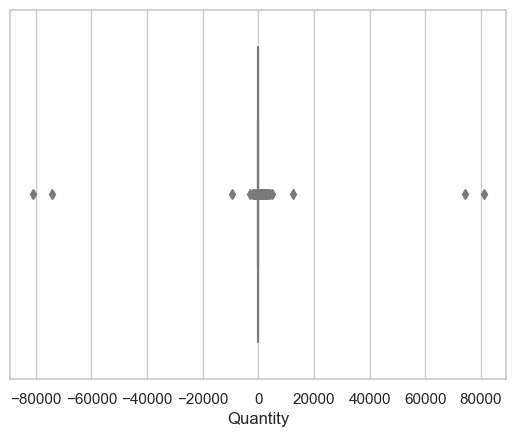

In [16]:
sns.set(style="whitegrid")
ax1 = sns.boxplot(x=df1["Quantity"],orient="h", palette="Pastel2")

#### Quantity has outliers spread on both sides and needs further preprocessing

In [17]:
#The code is filtering operation. It selects rows from the DataFrame df1 where the value in the "Quantity" column is less than -20000 or greater than 20000
df1[(df1.Quantity < -20000) | (df1.Quantity > 20000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Revenue
61619,541431,23166,Medium Ceramic Top Storage Jar,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,Medium Ceramic Top Storage Jar,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6
540421,581483,23843,"Paper Craft , Little Birdie",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6
540422,C581484,23843,"Paper Craft , Little Birdie",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.6


4 significant outlier records with 2 on either side of the distribution are present in quantity which was earlier highlighted in boxplot

In [18]:
# Records with Quantity < 0 and records with Quantity > 20000 which will be removed.Because some reason like:
# Firstly, 
    # Records with a negative quantity are excluded because negative quantities usually indicate product returns or cancellations. 
    # Including these records would distort the analysis and create inaccurate insights.
# Secondly, 
    # Positive outliers that are canceled are also excluded to maintain the integrity of the analysis. 
    # These outliers could be due to anomalies or errors in the data, such as large orders that were subsequently canceled. Including these outliers could skew the results and lead to misleading interpretations.

df1 = df1[(df1.Quantity>0) & (df1.Quantity <= 20000)]
df1.reset_index(drop=True,inplace = True)
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Revenue
0,536365,85123A,White Hanging Heart T-Light Holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,White Metal Lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,Cream Cupid Hearts Coat Hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,Knitted Union Flag Hot Water Bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,Red Woolly Hottie White Heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [19]:
# Records with UnitPrice Less than 0 are removed
df1 = df1[df1.UnitPrice > 0] #Keep only the rows where the UnitPrice column is greater than 0.
df1.reset_index(drop=True,inplace = True) #Dropping the original index and replacing it with a new sequential index starting from 0.
df1.shape

(397882, 9)

In [20]:
#Removing data of December 2011 which has partial month data (Because the latest date is just stop at 2011-12-09)
df1 = df1[df1.InvoiceDate < "2011-12-01 00:00:00"]
df1.reset_index(drop=True,inplace = True)
df1.shape

(380579, 9)

In [21]:
# Step 2: Calculate R,F,M

In [22]:
# Copy dataframe for RFM purpose
RFM_Data = df1.copy()
RFM_Data.shape

(380579, 9)

In [23]:
RFM_Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Revenue
0,536365,85123A,White Hanging Heart T-Light Holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,White Metal Lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,Cream Cupid Hearts Coat Hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,Knitted Union Flag Hot Water Bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,Red Woolly Hottie White Heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [24]:
# RECENCY

In [25]:
# Set variable current_date to this max of Invoice date in dataframe RFMData

In [26]:
#Set variable current_date to the max of Invoice date 
currentDateTime = RFM_Data['InvoiceDate'].max() +timedelta(days=1)
currentYear = currentDateTime.year
currentMonth = currentDateTime.month
currentDay = currentDateTime.day
currentDate = dt.date(currentYear,currentMonth,currentDay)
currentDate

datetime.date(2011, 12, 1)

In [27]:
# Create Recent Purchase Date column to have Date part alone of Invoice date
RFM_Data['RecentPurchaseDate'] = RFM_Data.InvoiceDate.dt.date
RFM_Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Revenue,RecentPurchaseDate
0,536365,85123A,White Hanging Heart T-Light Holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,White Metal Lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,Cream Cupid Hearts Coat Hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,Knitted Union Flag Hot Water Bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,Red Woolly Hottie White Heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [28]:
# In order to calculate Recency = Current date - RecentPurchaseDate 

In [29]:
# Compute Recency by Grouping RFM_Data on CustomerID and Maximum of RecentPurchaseDate
recency = RFM_Data.groupby('CustomerID')['RecentPurchaseDate'].max().reset_index()
recency.head()

,CustomerID,RecentPurchaseDate
0,12347.0,2011-10-31
1,12348.0,2011-09-25
2,12349.0,2011-11-21
3,12350.0,2011-02-02
4,12352.0,2011-11-03


In [30]:
# Create Current Date Column
recency['Current Date'] = currentDate
recency.head()

,CustomerID,RecentPurchaseDate,Current Date
0,12347.0,2011-10-31,2011-12-01
1,12348.0,2011-09-25,2011-12-01
2,12349.0,2011-11-21,2011-12-01
3,12350.0,2011-02-02,2011-12-01
4,12352.0,2011-11-03,2011-12-01


In [31]:
recency['RecentPurchaseDate'] = pd.to_datetime(recency['RecentPurchaseDate'])
recency['Current Date'] = pd.to_datetime(recency['Current Date'])
recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          4296 non-null   object        
 1   RecentPurchaseDate  4296 non-null   datetime64[ns]
 2   Current Date        4296 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 100.8+ KB


In [32]:
# Calculate Recency column
recency['Recency']= (recency['Current Date'] - recency['RecentPurchaseDate']).astype('timedelta64[ns]')
recency.head()

,CustomerID,RecentPurchaseDate,Current Date,Recency
0,12347.0,2011-10-31,2011-12-01,31 days
1,12348.0,2011-09-25,2011-12-01,67 days
2,12349.0,2011-11-21,2011-12-01,10 days
3,12350.0,2011-02-02,2011-12-01,302 days
4,12352.0,2011-11-03,2011-12-01,28 days


In [33]:
recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   CustomerID          4296 non-null   object         
 1   RecentPurchaseDate  4296 non-null   datetime64[ns] 
 2   Current Date        4296 non-null   datetime64[ns] 
 3   Recency             4296 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), object(1), timedelta64[ns](1)
memory usage: 134.4+ KB


In [34]:
# Drop RecentPurchaseDate, Current Date columns
recency=recency.drop(columns=['RecentPurchaseDate','Current Date'],axis=1)
recency.head()

,CustomerID,Recency
0,12347.0,31 days
1,12348.0,67 days
2,12349.0,10 days
3,12350.0,302 days
4,12352.0,28 days


In [35]:
# FREQUENCY

In [36]:
# Frequency = total number of orders per each Customer ID
# In this case Frequency will be calculated by the InvoiceNo per each CustomerTd
frequency = RFM_Data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency = frequency.rename(columns = {'InvoiceNo':'Frequency'})
frequency.head()

,CustomerID,Frequency
0,12347.0,6
1,12348.0,4
2,12349.0,1
3,12350.0,1
4,12352.0,8


In [37]:
# Check Infor of Recency dataframe
frequency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  4296 non-null   object
 1   Frequency   4296 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 67.3+ KB


In [38]:
# MONETARY
# The total amount of money a customer spent in that given period. 
# Therefore big spenders will be differentiated with other customers like: VIP.
monetary = RFM_Data.groupby('CustomerID')['Total Revenue'].sum().reset_index()
monetary = monetary.rename(columns = {'Total Revenue':'Monetary'})
monetary.head()

,CustomerID,Monetary
0,12347.0,4085.18
1,12348.0,1797.24
2,12349.0,1757.55
3,12350.0,334.40
4,12352.0,2506.04


In [39]:
# Convert Monetary to Int type
monetary.Monetary = (monetary.Monetary).astype(np.int64)
monetary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  4296 non-null   object
 1   Monetary    4296 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 67.3+ KB


In [40]:
# Step 3: Building RFM Table

In [41]:
# Combine three table: Recency table, Frequency, Monetary. Using Inner Join: On = 'CustomerID'
Merge1= recency.merge(frequency, on='CustomerID')
RFM_df= Merge1.merge(monetary, on='CustomerID')
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,31 days,6,4085
1,12348.0,67 days,4,1797
2,12349.0,10 days,1,1757
3,12350.0,302 days,1,334
4,12352.0,28 days,8,2506


In [42]:
RFM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   CustomerID  4296 non-null   object         
 1   Recency     4296 non-null   timedelta64[ns]
 2   Frequency   4296 non-null   int64          
 3   Monetary    4296 non-null   int64          
dtypes: int64(2), object(1), timedelta64[ns](1)
memory usage: 134.4+ KB


In [43]:
RFM_df.shape

(4296, 4)

In [44]:
#RFM dataframe has 4 columns with 4296 rows- 1 pertaining to each Customer Id

In [45]:
# Set CustomerID as Index for RFM_df
RFM_df.set_index('CustomerID',inplace=True)
RFM_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,31 days,6,4085
12348.0,67 days,4,1797
12349.0,10 days,1,1757
12350.0,302 days,1,334
12352.0,28 days,8,2506


In [46]:
RFM_df.isnull().sum().sum()

0

In [47]:
# Create quintiles for each RFM value
R = range(5, 0, -1)
F=range(1,6)
M =range(1,6)
RFM_df['R'] = pd.qcut(RFM_df['Recency'], q=5, labels=R)
RFM_df['F'] = pd.qcut(RFM_df['Frequency'].rank(method='first'), q=5, labels=False) +1 
# Set the Rank 
RFM_df['M'] = pd.qcut(RFM_df['Monetary'], q=5, labels=M)
RFM_df

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347.0,31 days,6,4085,4,5,5
12348.0,67 days,4,1797,3,4,4
12349.0,10 days,1,1757,5,1,4
12350.0,302 days,1,334,1,1,2
12352.0,28 days,8,2506,4,5,5
...,...,...,...,...,...,...
18280.0,269 days,1,180,1,2,1
18281.0,172 days,1,80,2,2,1
18282.0,118 days,1,100,2,2,1


In [48]:
#Best Recency score: 5
#Best Frequency score: 5
#Best Monetary score: 5

In [49]:
# Build RFM Segment and RFM Score

In [50]:
# Compute RFM Score as a String
RFM_df['RFM_Score'] = RFM_df.R.astype(str) +  RFM_df.F.astype(str) + RFM_df.M.astype(str)
RFM_df['RFM_Total'] = RFM_df[['R','F','M']].sum(axis=1)
RFM_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Total
CustomerID,,,,,,,,
12347.0,31 days,6,4085,4,5,5,455,14
12348.0,67 days,4,1797,3,4,4,344,11
12349.0,10 days,1,1757,5,1,4,514,10
12350.0,302 days,1,334,1,1,2,112,4
12352.0,28 days,8,2506,4,5,5,455,14


In [51]:
# Reset index
RFM_df.reset_index(inplace=True)
RFM_df.shape

(4296, 9)

In [52]:
# Convert RFM_Score to str type
RFM_df.RFM_Score = (RFM_df.RFM_Score).astype(np.int64)
RFM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   CustomerID  4296 non-null   object         
 1   Recency     4296 non-null   timedelta64[ns]
 2   Frequency   4296 non-null   int64          
 3   Monetary    4296 non-null   int64          
 4   R           4296 non-null   category       
 5   F           4296 non-null   int64          
 6   M           4296 non-null   category       
 7   RFM_Score   4296 non-null   int64          
 8   RFM_Total   4296 non-null   int64          
dtypes: category(2), int64(5), object(1), timedelta64[ns](1)
memory usage: 243.7+ KB


In [53]:
# Get to work on Segementation Csv

In [54]:
segmentation = pd.read_csv('Segmentation.csv')
segmentation

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [55]:
segmentation_null_check=segmentation.isna().sum()
segmentation_null_check

Segment      0
RFM Score    0
dtype: int64

In [56]:
segmentation.shape

(11, 2)

In [57]:
# Split text into a list
segmentation['RFM Score'] = segmentation['RFM Score'].str.split(',')
segmentation

,Segment,RFM Score
0,Champions,"[555, 554, 544, 545, 454, 455, 445]"
1,Loyal,"[543, 444, 435, 355, 354, 345, 344, 335]"
2,Potential Loyalist,"[553, 551, 552, 541, 542, 533, 532, 531..."
3,New Customers,"[512, 511, 422, 421, 412, 411, 311]"
4,Promising,"[525, 524, 523, 522, 521, 515, 514, 513..."
5,Need Attention,"[535, 534, 443, 434, 343, 334, 325, 324]"
6,About To Sleep,"[331, 321, 312, 221, 213, 231, 241, 251]"
7,At Risk,"[255, 254, 245, 244, 253, 252, 243, 242..."
8,Cannot Lose Them,"[155, 154, 144, 214, 215, 115, 114, 113]"
9,Hibernating customers,"[332, 322, 233, 232, 223, 222, 132, 123..."


In [58]:
# Convert list into multiple rows
segmentation_df = segmentation.explode('RFM Score')
segmentation_df
segmentation_df.rename(columns={'RFM Score':'RFM_Score'},inplace=True)
segmentation_df

,Segment,RFM_Score
0,Champions,555
0,Champions,554
0,Champions,544
0,Champions,545
0,Champions,454
...,...,...
10,Lost customers,112
10,Lost customers,121
10,Lost customers,131
10,Lost customers,141


In [59]:
# Convert RFM_Score to interger
segmentation_df.RFM_Score = (segmentation_df.RFM_Score).astype(np.int64)
segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    125 non-null    object
 1   RFM_Score  125 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [60]:
# Combine RFM_df with segementation => RFM_Model

In [61]:
RFM_Segment = pd.merge(RFM_df,segmentation_df,how='left',left_on='RFM_Score',right_on='RFM_Score')
RFM_Segment

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Total,Segment
0,12347.0,31 days,6,4085,4,5,5,455,14,Champions
1,12348.0,67 days,4,1797,3,4,4,344,11,Loyal
2,12349.0,10 days,1,1757,5,1,4,514,10,Promising
3,12350.0,302 days,1,334,1,1,2,112,4,Lost customers
4,12352.0,28 days,8,2506,4,5,5,455,14,Champions
...,...,...,...,...,...,...,...,...,...,...
4291,18280.0,269 days,1,180,1,2,1,121,4,Lost customers
4292,18281.0,172 days,1,80,2,2,1,221,5,About To Sleep
4293,18282.0,118 days,1,100,2,2,1,221,5,About To Sleep
4294,18283.0,1 days,15,1886,5,5,4,554,14,Champions


In [62]:
RFM_Segment.shape

(4296, 10)

In [63]:
# Step 4: Visualize & Insights

In [64]:
# Mini Step: Making Histogram to show Distribution of R,F,M
# Customer distribution based on recency.
Visual_RFM = RFM_Segment.copy()
Visual_RFM

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Total,Segment
0,12347.0,31 days,6,4085,4,5,5,455,14,Champions
1,12348.0,67 days,4,1797,3,4,4,344,11,Loyal
2,12349.0,10 days,1,1757,5,1,4,514,10,Promising
3,12350.0,302 days,1,334,1,1,2,112,4,Lost customers
4,12352.0,28 days,8,2506,4,5,5,455,14,Champions
...,...,...,...,...,...,...,...,...,...,...
4291,18280.0,269 days,1,180,1,2,1,121,4,Lost customers
4292,18281.0,172 days,1,80,2,2,1,221,5,About To Sleep
4293,18282.0,118 days,1,100,2,2,1,221,5,About To Sleep
4294,18283.0,1 days,15,1886,5,5,4,554,14,Champions


In [65]:
Visual_RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   CustomerID  4296 non-null   object         
 1   Recency     4296 non-null   timedelta64[ns]
 2   Frequency   4296 non-null   int64          
 3   Monetary    4296 non-null   int64          
 4   R           4296 non-null   category       
 5   F           4296 non-null   int64          
 6   M           4296 non-null   category       
 7   RFM_Score   4296 non-null   int64          
 8   RFM_Total   4296 non-null   int64          
 9   Segment     4296 non-null   object         
dtypes: category(2), int64(5), object(2), timedelta64[ns](1)
memory usage: 277.3+ KB


In [66]:
# convert the date column into a datetime object
Visual_RFM['day'] = Visual_RFM['Recency'].dt.days
# show the modified data frame
Visual_RFM
#Drop column Recency 
Visual_RFM=Visual_RFM.drop(columns=['Recency'],axis=1)
Visual_RFM.head()

,CustomerID,Frequency,Monetary,R,F,M,RFM_Score,RFM_Total,Segment,day
0,12347.0,6,4085,4,5,5,455,14,Champions,31
1,12348.0,4,1797,3,4,4,344,11,Loyal,67
2,12349.0,1,1757,5,1,4,514,10,Promising,10
3,12350.0,1,334,1,1,2,112,4,Lost customers,302
4,12352.0,8,2506,4,5,5,455,14,Champions,28


In [67]:
# change name day column
Visual_RFM.rename(columns = {'day':'Recency'}, inplace = True)
Visual_RFM = Visual_RFM[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R','F','M','RFM_Score','RFM_Total','Segment']]
Visual_RFM.head()
# Check Dtype
Visual_RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  4296 non-null   object  
 1   Recency     4296 non-null   int64   
 2   Frequency   4296 non-null   int64   
 3   Monetary    4296 non-null   int64   
 4   R           4296 non-null   category
 5   F           4296 non-null   int64   
 6   M           4296 non-null   category
 7   RFM_Score   4296 non-null   int64   
 8   RFM_Total   4296 non-null   int64   
 9   Segment     4296 non-null   object  
dtypes: category(2), int64(6), object(2)
memory usage: 277.3+ KB


### Distribution of Recency, Frequency and Monetary

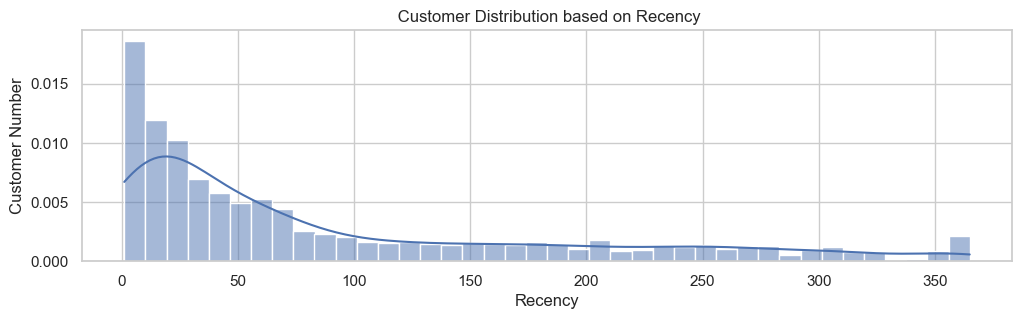

In [68]:
plt.figure(figsize=(12,3))
sns.histplot(Visual_RFM["Recency"],kde=True,bins=40,stat="density")
plt.xlabel("Recency")
plt.ylabel("Customer Number")
plt.title(" Customer Distribution based on Recency")  

plt.show()

- We can note that the histogram is biased towards the left side 
- This is a sign of distribution which is a right-skewed distribution (called a positive skew distribution, is when the chart's tail is longer on its right side and its peak veers to the left)
- Also we can see that the rug plot is crowded between 0 and 100
- Based on that we can see that we have a high concentration of customers in the last 100 days (up until 1/12/2011)

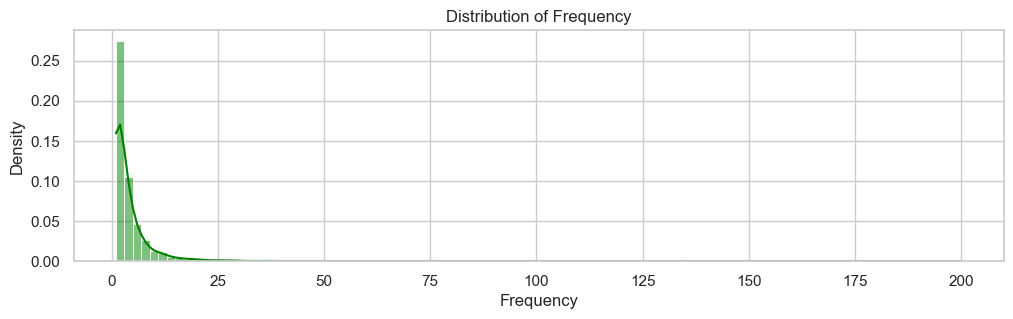

In [69]:
colnames = ['Frequency']
for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.histplot(Visual_RFM[col],kde=True, bins=100, color='green',stat="density")
    ax.set_title('Distribution of %s' % col)
    plt.show()

1. Customer Engagement:
The frequency chart indicates the number of times customers have made purchases or engaged with your business. 
Most customers fall within the 0 to 25 range, it suggests that they may not be frequent purchasers or repeat visitors. 
This may be an opportunity for you to focus on strategies to increase customer engagement and retention
2. Customer Loyalty Programs: 
A low frequency indicates that customers may not be strongly tied to your brand. 
Implementing loyalty programs, such as rewarding repeat purchases or offering exclusive discounts, might incentivize customers to increase their engagement and frequency.
3. New Customer Acquisition: 
This can be also new customer want to try out some company products. It could indicate that your business is attracting a steady stream of new buyers. 
This information could guide your strategies in terms of customer acquisition and onboarding, aiming to nurture these customers into becoming loyal and frequent purchasers

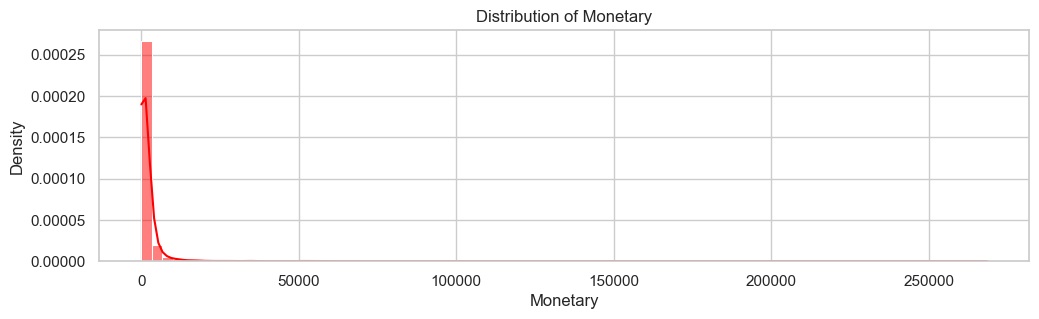

In [70]:
colnames = ['Monetary']
for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.histplot(Visual_RFM[col],kde=True,bins=80,color='red',stat="density")
    ax.set_title('Distribution of %s' % col)
    plt.show()

#### It implies that the majority of customer transactions have a lower monetary value.
1. Upselling and Cross-selling Opportunities: Customers with lower monetary values may present opportunities for upselling or cross-selling. 
By analyzing their purchasing behavior, you can identify complementary products or services that may entice them to increase their spending.
2. Marketing Strategy: With a focus on increasing Revenue value You can design targeted marketing campaigns to encourage repeat purchases and increase customer loyalty. This might involve offering personalized discounts, promotions, or rewards to incentivize customers to spend more 

### Overall Analyze:
- Recency distribution is right-skewed, showing that the majority of customers made a purchase in the recent past. It has a long tail containing single customers who made their order long time ago.
- Both frequency and monetary distributions are right-skewed.
- The chart reveals that most of customers has low frequency (small number of orders, around 10 per customer). 
- When it comes to monetary, it follows similar pattern. Most of customers have only spent little amount of money but there is another (significant in size) group that have spent much more

### Analysis of RFM Segments

In [71]:
# Calculate the number of each customer type, total money spend and avg recency of those customer
grp = Visual_RFM.groupby('Segment').agg({'CustomerID': 'count',
                                     'Monetary': 'sum',
                                     'Recency': 'mean'}).reset_index()
grp.columns = ['Segment', 'Cust_count', 'Total_monetary', 'Avg_recency']
grp.sort_values(by='Cust_count', ascending=False, inplace=True)


,Segment,Cust_count,Total_monetary,Avg_recency
3,Champions,835,5430072,11.893413
4,Hibernating customers,672,271997,150.428571
5,Lost customers,477,93406,270.174004
1,At Risk,427,747167,142.346604
6,Loyal,421,897040,35.318290
9,Potential Loyalist,414,219962,26.553140
0,About To Sleep,280,73416,87.942857
8,New Customers,261,59192,25.885057
7,Need Attention,251,263620,33.430279
10,Promising,158,123172,23.335443


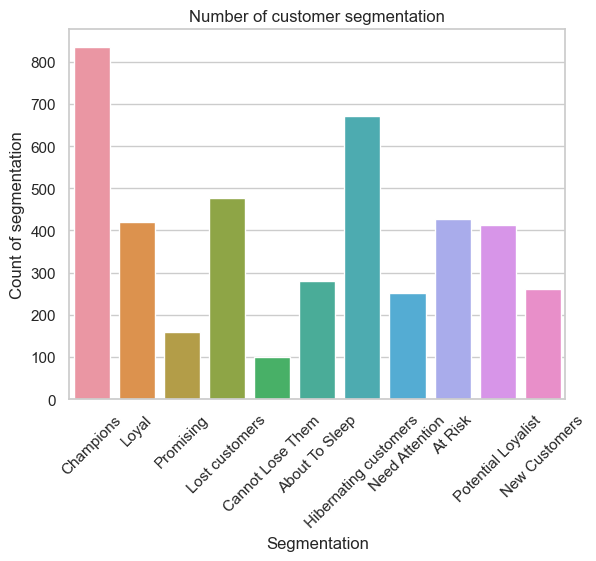

In [85]:
# Seaborn Countplot of customer segmentation (count number of customer type_label)
sns.countplot(x=Visual_RFM["Segment"])
plt.title('Number of customer segmentation')
plt.xlabel('Segmentation')
plt.ylabel('Count of segmentation')
plt.xticks(rotation=45)
plt.show()

In [80]:
# Calculate the percentage of each customer type and the percentage of money their spend
grp['Count_share'] = grp['Cust_count'] / grp['Cust_count'].sum()
grp['Monetary_share'] = grp['Total_monetary'] / grp['Total_monetary'].sum()
grp.head()

,Segment,Cust_count,Total_monetary,Avg_recency,Count_share,Monetary_share
3,Champions,835,5430072,11.893413,0.194367,0.653128
4,Hibernating customers,672,271997,150.428571,0.156425,0.032716
5,Lost customers,477,93406,270.174004,0.111034,0.011235
1,At Risk,427,747167,142.346604,0.099395,0.089869
6,Loyal,421,897040,35.318290,0.097998,0.107896


In [72]:
# Import Squarify to make Tree Map
!pip install squarify
import squarify

In [73]:
# Mini Step 2: Analysis of RFM Segmentsv (Tree MaP Visualize)
# A dictionary that defines the aggregation operations to be performed on specific columns of the DataFrame Visual_RFM
agg_dict = {
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'sum'
}
# Create new DataFrame name df_analysis
df_analysis = Visual_RFM.groupby('Segment').agg(agg_dict).sort_values(by='Recency').reset_index()
# Renaming and Calculations
df_analysis.rename({'Segment': 'label', 'CustomerID': 'count'}, axis=1, inplace=True)
df_analysis['count_share'] = df_analysis['count'] / df_analysis['count'].sum()
df_analysis['monetary_share'] = df_analysis['Monetary'] / df_analysis['Monetary'].sum()
df_analysis['monetary'] = df_analysis['Monetary'] / df_analysis['count']

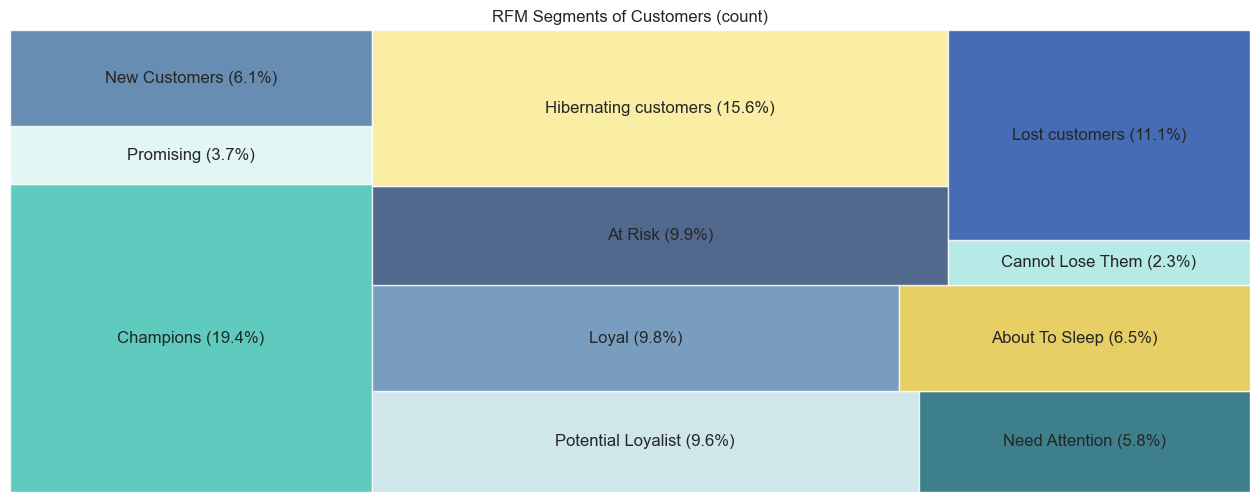

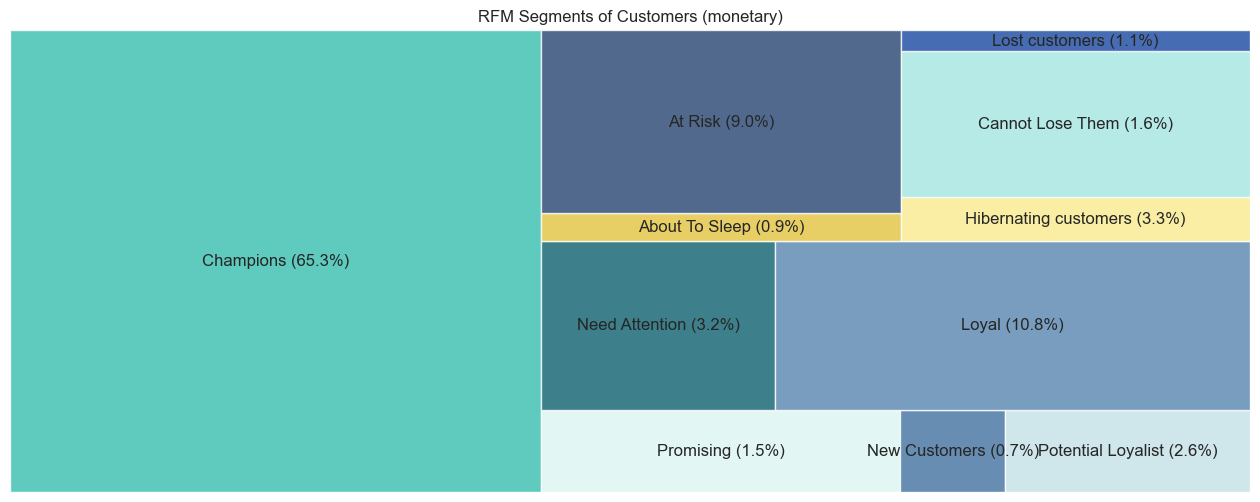

In [74]:
colors = ['#37BEB0', '#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#5885AF', '#E1C340', '#274472', '#F8EA8C', '#A4E5E0', '#1848A0']

for col in ['count', 'monetary']:
    labels = df_analysis['label'] + df_analysis[col + '_share'].apply(lambda x: ' ({0:.1f}%)'.format(x*100))

    fig, ax = plt.subplots(figsize=(16,6))
    squarify.plot(sizes=df_analysis[col], label=labels, alpha=.8, color=colors)
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.show()

#### Anaalyze: 
- There is strong group of 'champions' who are the most profitable customers (over 19% of all customers generating over 60% of all sales). 
- At the same time it should worry that group of 'hibernating' is so big - over 15% of all customers. There is an opportunity that part of this group could be reactivated with a reach out campaign.
- Moreover, the company should focus on the group 'at risk' and 'Lost Customer'to increase customer retention (they generate 10% of total sales).

#### Recommendation:
#### For increasing the Champions customer: 
Businesses can take care of and encourage these customers to come back more times by proposing customer loyalty programs with different values and unique incentives and priorities.Business should deploy product combos based on predictions from order history
#### For Decreasing Hibernating,Lost,about to sleep Customers:
Businesses need to stimulate this customer file so that they make transactions as soon as possible. Because this is the group of customers most likely to forget our company's products. Therefore, businesses can carry out retargeting campaigns, short-term promotion programs with a number of forms such as vouchers, discounts, etc.

C:\Users\Admin\AppData\Local\Temp\ipykernel_16280\3999833596.py:5: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  plot = sns.scatterplot(x='Recency', y='Frequency', data=df_analysis, hue='label', s=300, palette=palette)


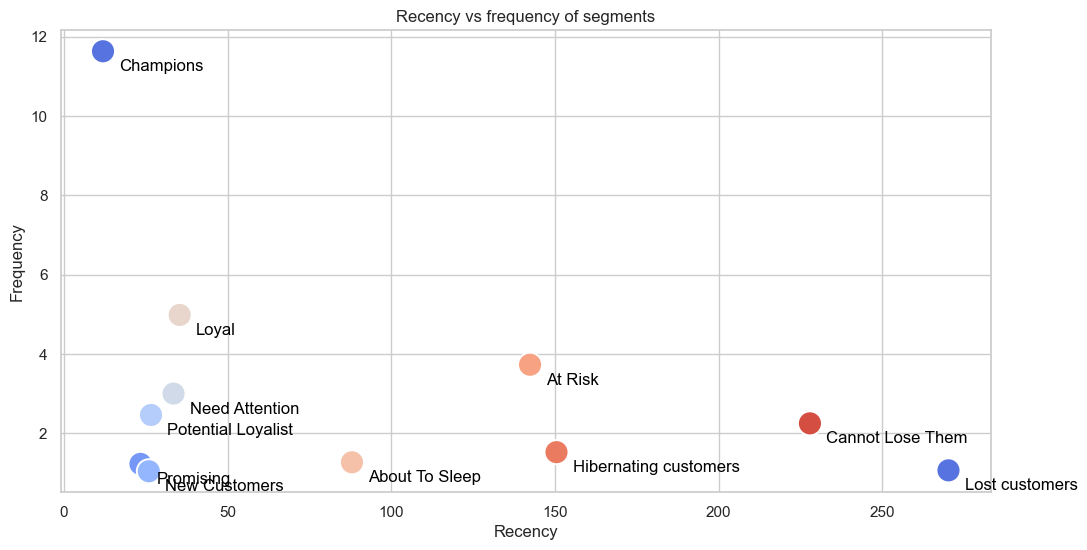

In [77]:
# Mini Step 3: Check the relationship between Recency and Frequency by Segment 
palette = sns.color_palette("coolwarm", 10)

fig, ax = plt.subplots(figsize=(12,6))
plot = sns.scatterplot(x='Recency', y='Frequency', data=df_analysis, hue='label', s=300, palette=palette)

for i in range(len(df_analysis)):
     plot.text(df_analysis['Recency'][i]+5,
               df_analysis['Frequency'][i]-0.5,
               df_analysis['label'][i],
               horizontalalignment='left',
               size='medium', color='black')

ax.set_title('Recency vs frequency of segments')
ax.get_legend().remove()
plt.show()

### Analyze
- Scatterplot visualizes the set of rules applied to generate RFM segments. 
- 'Champions' and 'loyal customers' are the ones who buy the most often and who made their last order recently.
- 'Loyal' and 'Potential Loyalist' that have last order recently but Purchase frequency is still quite low.
- 'New customers' and 'promising' made purchases not long time ago but they are not frequent buyers yet. 
- 'hibernating','Cannot lose them','Lost' customers are those one with the lowest recency and frequency scores.

### Recommendation:
### For Increasing New Customer and Promising Customer:
- Businesses will need a systematic and personalized care process. 
- For example: Send a thank you note and get feedback on the customer's first purchase experience. In addition, businesses can give away discount vouchers for future purchases.
- Then, businesses need to ensure the frequency of interaction and recommend information about similar products with the first shopping cart, cross-sell/upsell with combos and larger sized products.
### For increasing Loyal and Potential Loyalist:
- Businesses can propose incentive programs tied to purchases to motivate customers to buy more. For example: Shop can design a promotion program such as: Buy the 2nd product get 10% off, buy the 3rd product get 15% off,... 
- Note that: the company needs to calculate the appropriate discount level, to Stimulate shopping demand while ensuring profits.
### For Decreasing 'Need Attention' and 'At Risk' Customer: 
- The solution businesses can use is to use surveys in order to know what makes customers unhappy and not return to buy.

## Overall of the Project:
##### Firstly, Business should take more focus on the Champion and Loyal customer 
- These customer had taken an enormous of RFM segment. As well as These customers had been showed that they bought company products recently, and often spend the most.
    - Recommendation to improve these customer are:
      - For Champion customer:
                   - Giving them exclusive offers
                   - Implementing loyalty rewards or increasing their loyalty rewards
                   - Providing them with early access to new products
                   - Inviting them to leave you a review
      - For Loyal Customer: Pitch your top-tier loyalty rewards- Tell them about new product releases- Invite them to follow on social media or send them information about latest discount to enhance the brand experience
##### Secondly, There were having 3 type of customer that were: Hibernating, Lost and at risk customers.
- Business should take notice more on them because these are customers who have not returned for a long time and have weak purchasing power (infrequent purchasing frequency, not high shopping cart value). Therefore, it is not easy for businesses to re-engage them because usually customers' decision not to continue purchasing comes from negative reviews about their experience with the product/service or they have been loyal to the other company.
    - Recommendation to decrease these  customer:
        - For Recommendation: I suggest that businesses should send personal emails, interact directly via social media or call to stay connected with these customers.
            Besides, businesses need to stimulate this customer file so that they make a transaction as soon as possible or else the rate of customers leaving the business's products will increase significantly. Businesses can carry out campaigns for retargeting purposes, short-term promotion programs such as vouchers, discounts, exclusive offers, etc.

### Definition and recommended action for each customer segment:

| Segment | Characteristics | Recommendation |
| :-: | :-: | :-: |
| Champions | Bought recently, buy often and spend the most! | Reward them. Can be early adopters for new products. Will promote your brand. |
| Loyal | Spend good money with us often. Responsive to promotions. | Upsell higher value products. Ask for reviews. Engage them. |
| Potential Loyalist | Recent customers, but spent a good amount and bought more than once. | Offer membership / loyalty program, recommend other products. |
| New customers | Bought most recently, but not often. | Provide on-boarding support, give them early success, start building relationship. |
| Promising | Recent shoppers, but haven’t spent much. | Create brand awareness, offer free trials |
| Need attention | Above average recency, frequency and monetary values. May not have bought very recently though. | Make limited time offers, Recommend based on past purchases. Reactivate them. |
| About to sleep | Below average recency, frequency and monetary values. Will lose them if not reactivated. | Share valuable resources, recommend popular products / renewals at discount, reconnect with them. |
| At risk | Spent big money and purchased often. But long time ago. Need to bring them back! | Send personalized emails to reconnect, offer renewals, provide helpful resources. |
| Cannot lose them | Made biggest purchases, and often. But haven’t returned for a long time. | Win them back via renewals or newer products, don’t lose them to competition, talk to them. |
| Hibernating customers | Last purchase was long back, low spenders and low number of orders. | Offer other relevant products and special discounts. Recreate brand value. |
| Lost customers | Lowest recency, frequency and monetary scores. | Revive interest with reach out campaign, ignore otherwise. |